## Занятие 6
## Математический анализ
## Дифференцирование

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import diff, solve, nsolve, solveset, latex, S, simplify, fraction, Intersection
from sympy import sin as Sin
from sympy.calculus.util import continuous_domain
from IPython.display import display, Latex, Math
%matplotlib inline

from sympy import exp
from sympy.abc import x, y, z
from math import e

## Схема анализа функции.
1. Область определения

2. Четность

3. Периодичность

4. Точки пересечения с осями координат

5. Точки экстремума

6. Точки перегиба

7. Асимптоты

8. График

In [2]:
# Объявления необходимых функций
def printf(arr_x, arr_y):
    txt = ''
    
    if len(arr_x) == 0:
        txt = 'None'
    else:
        for i in range(len(arr_x)):
            if i + 1 == len(arr_x):
                txt += f'({latex(arr_x[i].evalf())},\ {latex(arr_y[i].evalf())})'
            else:
                txt += f'({latex(arr_x[i].evalf())},\ {latex(arr_y[i].evalf())}),\ '
                
    return txt


def isinflection(point_x, sec_diff):
    if sec_diff.subs(x, point_x - 1) > 0 and sec_diff.subs(x, point_x + 1) < 0 or \
        sec_diff.subs(x, point_x - 1) < 0 and sec_diff.subs(x, point_x + 1) > 0:
        return True
    return False


def func_parity():
    txt = '2)\ Четность:\ '
    if func(-x) == func(x):
        txt += f'четная\ функция'
    elif func(-x) == -func(x):
        txt += f'нечетная\ функция'
    else:
        txt += f'функция\ общего\ вида'
    return txt

## Лабораторная работа 6
## Математический анализ
## Задание 1
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y = x^2e^{-x}
$$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

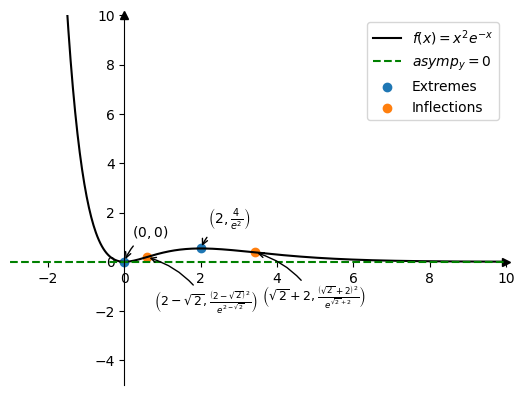

In [3]:
def func(x, lib='sympy'):
    if lib == 'sympy':
        return x ** 2 * exp(-x)
    elif lib == 'np':
        return x ** 2 * np.exp(-x)
    else:
        return 'error'


# 1)
D = continuous_domain(func(x), x, S.Reals)
display(Latex(fr'$\text{{1) Область определения: }} x \in {latex(D)}$'))

# 2)
display(Latex(fr'$\text{func_parity()}$'))

# 3)
display(Latex(fr'$\text{{3) Периодичность: нет периода}}$'))

# 4)
insections_x = solve(func(x), x)
insections_y = [func(x) for x in insections_x]
txt = printf(insections_x, insections_y)
display(Latex(fr'$\text{{4) Точки пересечения с осями координат: }} {txt}$'))

# 5)
extremes_x = solve(func(x).diff(x, 1), x, rational=False)
extremes_y = [func(x) for x in extremes_x]
txt = printf(extremes_x, extremes_y)
display(Latex(fr'$\text{{5) Точки экстремумов: }} {txt}$'))

# 6)
inflections_x = solve(func(x).diff(x, 2), x)
inflections_y = []
for x_coord in inflections_x:
    if isinflection(x_coord, func(x).diff(x, 2)):
        inflections_y.append(func(x_coord))
if len(inflections_y) == 0:
    display(Latex(fr'$\text{{6) Точки перегиба: нет точек перегиба}}$'))
else:
    txt = printf(inflections_x, inflections_y)
    display(Latex(fr'$\text{{6) Точки перегиба: }} {txt}$'))

# 7)
display(Latex(fr'$\text{{7) Асимптоты}}$'))
## Вертикальные
display(Latex(fr'$\ \ \ \ \text{{Вертикальные: }} x \in {latex(D)} \Rightarrow \text{{нет веритикальных асимптот}}$'))
## Горизонтальные/наклонные
k_lim_pos = sympy.limit(func(x)/x, x, +sympy.oo)
k_lim_neg = sympy.limit(func(x)/x, x, -sympy.oo)
k = k_lim_pos # т.к. k_lim_neg = -$\infty$
b = sympy.limit(func(x) - k * x, x, sympy.oo)
asymp_y = k * x + b
display(Latex(fr'$\ \ \ \ \text{{Горизонтальные/наклонные: y = }} {latex(asymp_y)}$'))

# 8)
display(Latex(fr'$\text{{8) График:}}$'))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_color('none')
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False) 
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


X = np.linspace(-10, 10, 1000)
ax.plot(X, func(X, lib='np'), color='black', label=r'$f(x) = ' + latex(func(x)) + r'$')
ax.set(xlim=(-3,10), ylim=(-5, 10))

ax.plot([X[0], X[-1]], [asymp_y.subs(x, X[0]), asymp_y.subs(x, X[-1])], 'g--', label=r'$asymp_y = ' + latex(asymp_y) + r'$')

ax.scatter(extremes_x, extremes_y, label='Extremes')
for i, x_coord in enumerate(extremes_x):
    ax.annotate(r'$\left(' + latex(x_coord) + r', ' + latex(extremes_y[i]) + r'\right)$', 
               xy=(x_coord, extremes_y[i]), xycoords='data', xytext=(x_coord + 0.2, extremes_y[i] + 1),
               arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
    
ax.scatter(inflections_x, inflections_y, label='Inflections')
for i, x_coord in enumerate(inflections_x):
    ax.annotate(r'$\left(' + latex(x_coord) + r', ' + latex(inflections_y[i]) + r'\right)$', 
               xy=(x_coord, inflections_y[i]), xycoords='data', xytext=(x_coord + 0.2, inflections_y[i] - 2),
               arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"), fontsize=9)

ax.legend(loc='upper right')



## Задание 2
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот, отметить и подписать точки экстремума и точки перегиба,
включить функцию и асимптоты в легенду. 
$$
y=xe^{2/x} + 1 
$$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

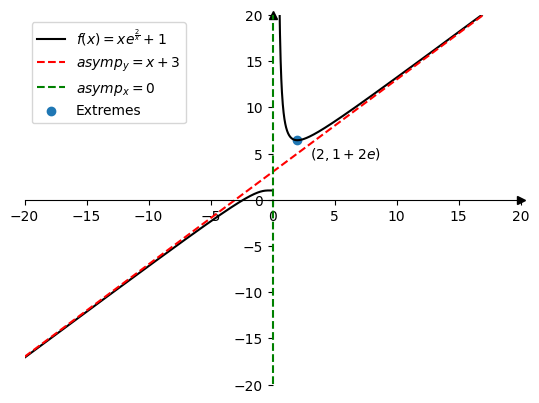

In [4]:
def func(x, lib='sympy'):
    if lib == 'sympy':
        return x * exp(2/x) + 1
    elif lib == 'np':
        return x * np.exp(2/x) + 1
    else:
        return 'error'
        

# 1)
D = continuous_domain(func(x), x, S.Reals)
display(Latex(fr'$\text{{1) Область определения: }} x \in {latex(D)}$'))

# 2)
display(Latex(fr'$\text{func_parity()}$'))

# 3)
display(Latex(fr'$\text{{3) Периодичность: нет периода}}$'))

# 4)
display(Latex(fr'$\text{{4) Точки пересечения с осями координат: }} f(x) \neq 0 \Rightarrow \text{{нет перчесчений с осями}}$'))

# 5)
extremes_x = solve(func(x).diff(x, 1), x)
extremes_y = [func(x) for x in extremes_x]
txt = printf(extremes_x, extremes_y)
display(Latex(fr'$\text{{5) Точки экстремумов: }} {txt}$'))

# 6)
inflections_x = solve(func(x).diff(x, 2), x)
inflections_y = []
for x_coord in inflections_x:
    if isinflection(x_coord, func(x).diff(x, 2)):
        inflections_y.append(func(x_coord))
txt = printf(inflections_x, inflections_y)
display(Latex(fr'$\text{{6) Точки перегиба: }} {txt}$'))

# 7)
display(Latex(fr'$\text{{7) Асимптоты}}$'))
## Вертикальные
vert_lim_pos = sympy.limit(func(x), x, 0, '+')
vert_lim_neg = sympy.limit(func(x), x, 0, '-')
# display(vert_lim_pos, vert_lim_neg)
asymp_x = 0
display(Latex(fr'$\ \ \ \ \text{{Вертикальные: x = 0}} $'))
## Горизонтальные/наклонные
k_lim_pos = sympy.limit(func(x)/x, x, +sympy.oo)
k_lim_neg = sympy.limit(func(x)/x, x, -sympy.oo)
k = k_lim_pos
b = sympy.limit(func(x) - k * x, x, sympy.oo)
asymp_y = k * x + b
display(Latex(fr'$\ \ \ \ \text{{Горизонтальные/наклонные: y = }} {latex(asymp_y)}$'))

# 8)
display(Latex(fr'$\text{{8) График:}}$'))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.spines['left'].set_color('none')
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False) 
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)


X1 = np.linspace(-20, -0.01, 1499)
X2 = np.linspace(0.01, 20, 1499)
ax.plot(X1, func(X1, lib='np'), color='black', label=r'$f(x) = ' + latex(func(x)) + r'$')
ax.plot(X2, func(X2, lib='np'), color='black')
ax.set(xlim=(-20,20), ylim=(-20, 20))

ax.plot([X1[0], X2[-1]], [asymp_y.subs(x, X1[0]), asymp_y.subs(x, X2[-1])], 'r--', label=r'$asymp_y = ' + latex(asymp_y) + r'$')
ax.axvline(x=asymp_x, color='green', linestyle='--', label=r'$asymp_x = ' + latex(asymp_x) + r'$')
ax.scatter(extremes_x, extremes_y, label='Extremes')
ax.annotate(r'$\left(' + latex(extremes_x[0]) + r', ' + latex(extremes_y[0]) + r'\right)$', xy=(extremes_x[0], extremes_y[0]), xycoords='data', xytext=(extremes_x[0] + 1, extremes_y[0] -2 ))
ax.legend(loc='upper left')

## Индивидуальное задание
Исследовать функцию с помощью производной, найти необходимые пределы и решить уравнения.

Построить график функции и асимптот (если есть), отметить и подписать точки экстремума и точки перегиба (если есть),
включить функцию и асимптоты (если есть) в легенду. 

Вариант $98$


$$f(x) = \frac{4 x - 15}{4 x - 9}$$


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

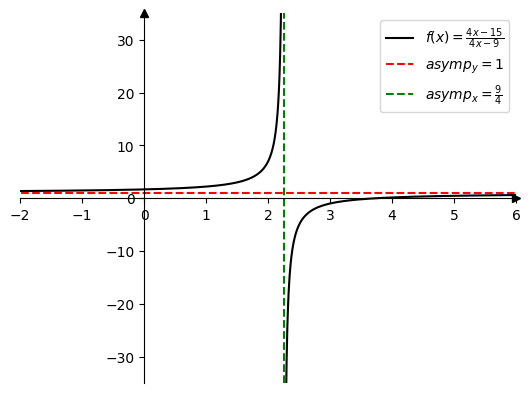

In [5]:
def func(x):
    return (4 * x - 15) / (4 * x - 9)


# 1)
D = continuous_domain(func(x), x, S.Reals)
display(Latex(fr'$\text{{1) Область определения: x}} \in {latex(D)}$'))

# 2)
display(Latex(fr'$\text{func_parity()}$'))

# 3)
display(Latex(fr'$\text{{3) Периодичность: нет периода}}$'))

# 4)
intersection_x = solve(func(x), x)
intersection_y = [func(x) for x in intersection_x]
txt = printf(intersection_x, intersection_y)
display(Latex(fr'$\text{{4) Точки пересечения с осями координат: }} {txt}$'))

# 5)
extremes_y = solve(func(x).diff(x, 1), x)
extremes_x = [func(x) for x in extremes_y]
txt = printf(extremes_x, extremes_y)
display(Latex(fr'$\text{{5) Точки экстремумов: }} {txt}$'))

# 6)
inflections_x = solve(func(x).diff(x, 2), x)
inflections_y = []
for x_coord in inflections_x:
    if isinflection(x_coord, func(x).diff(x, 2)):
        inflections_y.append(func(x_coord))
txt = printf(inflections_x, inflections_y)
display(Latex(fr'$\text{{6) Точки перегиба: }} {txt}$'))

# 7)
display(Latex(fr'$\text{{7) Асимптоты:}}$'))
## Вертикальные
lim_pos = sympy.limit(func(x), x, S(9)/4, '+')
lim_neg = sympy.limit(func(x), x, S(9)/4, '-')
asymp_x = S(9)/4
display(Latex(fr'$\ \ \ \ \text{{Вертикальные: односторонние пределы бесконечны}}\Rightarrow x = {latex(asymp_x)} \text{{ — вертикальная асимптота}}$'))
## Горизонтальные/наклонные
k_lim_pos = sympy.limit(func(x)/x, x, +sympy.oo)
k_lim_neg = sympy.limit(func(x)/x, x, -sympy.oo)
k = k_lim_pos
b = sympy.limit(func(x) - k * x, x, sympy.oo)
asymp_y = k * x + b
display(Latex(fr'$\ \ \ \ \text{{Горизонтальные/наклонные: y = }} {latex(asymp_y)}$'))

# 8)
display(Latex(fr'$\text{{8) График:}}$'))

ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False) 
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

X_left = np.linspace(-3, 2.24, 999)
X_right = np.linspace(2.26, 6, 999)
ax.plot(X_left, func(X_left), color='black', label=r'$f(x) = ' + latex(func(x)) + r'$')
ax.plot(X_right, func(X_right), color='black')

ax.set(ylim=(-35, 35), xlim=(-2, 6))

ax.plot([X_left[0], X_right[-1]], [asymp_y.subs(x, X_left[0]), asymp_y.subs(x, X_right[-1])], 'r--', label=r'$asymp_y = ' + latex(asymp_y) + r'$')
ax.axvline(x=asymp_x, color='green', linestyle='--', label=r'$asymp_x = ' + latex(asymp_x) + r'$')
ax.legend(loc='best')
